## Load packages

In [1]:
import itertools
import numpy as np
import pandas as pd
import os
import scipy.sparse
import sys

CURRENT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.append(PARENT_DIR)

from FDApy.univariate_functional import UnivariateFunctionalData
from FDApy.irregular_functional import IrregularFunctionalData
from FDApy.multivariate_functional import MultivariateFunctionalData

from FDApy.plot import *
from FDApy.utils import *

In [2]:
# Load the data into Pandas dataframe
cd4 = pd.read_csv(''.join([CURRENT_DIR, '/cd4.csv']), index_col=0)

In [3]:
# Create IrregularFunctionalData for cd4 data
all_argvals = cd4.columns.astype(np.int64)
argvals = np.array([np.array(all_argvals[~np.isnan(row)]) for row in cd4.values])
values = np.array([row[~np.isnan(row)] for row in cd4.values])
cd4counts = IrregularFunctionalData(argvals, values)

In [4]:
# Print example of a IrregularFunctionalData
cd4counts

Irregular Functional data objects with 366 observations of 1-dimensional support
argvals:
	Values in -18 ... 42.
values:
	Values in 10.0 ... 3184.0.
There are 1 - 11 sampling points per observation.

In [5]:
# Accessing the attribut of the classes
cd4counts.argvals

array([array([-9, -3,  3]), array([-3,  3,  9, 15]),
       array([-15,  -9,  -3,   3,   9,  17,  22,  29]),
       array([-17,  -9,  -3,   3]),
       array([-4,  4, 10, 13, 19, 25, 32, 38]), array([-17, -10,  10]),
       array([-9, -3,  3,  9]), array([-3,  3, 10, 14, 27, 34, 40]),
       array([-13,  -9]), array([-3,  3, 15, 21, 27, 39]),
       array([-16, -10,  -3,   3,   9,  15,  22,  27]),
       array([-15,  -3,  23]),
       array([-15,  -9,  -3,   3,   9,  15,  21,  27,  34,  40]),
       array([-15,  -9,  -3,   3,   9,  21]), array([-9, -3,  3,  9, 14]),
       array([-3,  3]), array([-9, -3,  3,  9, 14, 27, 33]),
       array([ 3,  9, 15, 39]), array([-3,  3,  9, 14, 21, 27, 33, 39]),
       array([-3,  3,  9, 15, 21, 33, 39]),
       array([-14,  -9,  -3,   3,  15,  21,  32,  39]),
       array([-16, -10,  10,  16]), array([-3,  3,  9, 39]),
       array([-9, -3,  3, 21]), array([ 3,  9, 16, 22]),
       array([-15,  -3,   3,  19]),
       array([-15,  -9,  -3,   3,  27, 

In [6]:
# Check the values
cd4counts.values

array([array([548., 893., 657.]), array([752., 459., 181., 434.]),
       array([ 846., 1102.,  801.,  824.,  866.,  704.,  757.,  726.]),
       array([1277., 1132., 1454.,  738.]),
       array([994., 486., 605., 880., 352., 376., 212., 237.]),
       array([1119.,  729.,  355.]), array([429., 467., 599., 184.]),
       array([783., 858., 709., 517., 952., 845., 428.]),
       array([2016., 2622.]),
       array([1761., 2271., 1054., 1418., 1886., 1306.]),
       array([ 853., 1369., 1049.,  682.,  328.,  480.,  224.,  440.]),
       array([1568., 1010.,  142.]),
       array([ 561., 1102., 1620.,  697.,  538.,  811.,  592.,  568.,  384.,
        431.]),
       array([ 218., 2241., 1714., 1250.,  499.,  382.]),
       array([1265.,  960.,  944.,  766., 1265.]), array([639., 540.]),
       array([1261., 3184., 1225.,  804.,  742.,  756.,  368.]),
       array([584., 447., 439., 340.]),
       array([1159., 1172.,  653.,  741.,  736.,  851.,  717.,  592.]),
       array([933., 876., 17

In [7]:
# Check the standardize argvals
cd4counts.argvals_stand

array([array([0. , 0.5, 1. ]),
       array([0.        , 0.33333333, 0.66666667, 1.        ]),
       array([0.        , 0.13636364, 0.27272727, 0.40909091, 0.54545455,
       0.72727273, 0.84090909, 1.        ]),
       array([0. , 0.4, 0.7, 1. ]),
       array([0.        , 0.19047619, 0.33333333, 0.4047619 , 0.54761905,
       0.69047619, 0.85714286, 1.        ]),
       array([0.        , 0.25925926, 1.        ]),
       array([0.        , 0.33333333, 0.66666667, 1.        ]),
       array([0.        , 0.13953488, 0.30232558, 0.39534884, 0.69767442,
       0.86046512, 1.        ]),
       array([0., 1.]),
       array([0.        , 0.14285714, 0.42857143, 0.57142857, 0.71428571,
       1.        ]),
       array([0.        , 0.13953488, 0.30232558, 0.44186047, 0.58139535,
       0.72093023, 0.88372093, 1.        ]),
       array([0.        , 0.31578947, 1.        ]),
       array([0.        , 0.10909091, 0.21818182, 0.32727273, 0.43636364,
       0.54545455, 0.65454545, 0.76363636, 0

In [8]:
# Number of observations for an object
cd4counts.nObs()

366

In [9]:
# Number of sampling points for an object
cd4counts.nObsPoint()

[3,
 4,
 8,
 4,
 8,
 3,
 4,
 7,
 2,
 6,
 8,
 3,
 10,
 6,
 5,
 2,
 7,
 4,
 8,
 7,
 8,
 4,
 4,
 4,
 4,
 4,
 7,
 8,
 7,
 2,
 6,
 3,
 9,
 7,
 2,
 2,
 5,
 7,
 5,
 3,
 5,
 10,
 6,
 6,
 2,
 4,
 7,
 4,
 6,
 6,
 6,
 7,
 4,
 9,
 6,
 6,
 3,
 4,
 4,
 4,
 6,
 4,
 4,
 6,
 4,
 5,
 2,
 5,
 4,
 2,
 5,
 8,
 6,
 2,
 7,
 9,
 4,
 3,
 4,
 2,
 3,
 1,
 5,
 5,
 3,
 8,
 5,
 6,
 5,
 8,
 5,
 9,
 2,
 5,
 5,
 5,
 6,
 5,
 2,
 5,
 7,
 7,
 5,
 7,
 5,
 4,
 9,
 2,
 3,
 9,
 8,
 3,
 8,
 10,
 4,
 6,
 3,
 7,
 6,
 6,
 6,
 9,
 9,
 4,
 7,
 3,
 3,
 7,
 9,
 4,
 6,
 6,
 4,
 1,
 6,
 6,
 8,
 6,
 8,
 6,
 9,
 6,
 2,
 1,
 1,
 1,
 6,
 4,
 3,
 3,
 7,
 7,
 8,
 6,
 3,
 3,
 9,
 8,
 6,
 7,
 9,
 5,
 6,
 6,
 5,
 3,
 2,
 5,
 7,
 3,
 7,
 4,
 3,
 8,
 4,
 5,
 6,
 4,
 10,
 4,
 3,
 6,
 2,
 8,
 11,
 1,
 3,
 8,
 8,
 7,
 2,
 1,
 2,
 4,
 4,
 6,
 1,
 4,
 5,
 7,
 5,
 7,
 8,
 8,
 3,
 3,
 2,
 7,
 5,
 9,
 6,
 4,
 5,
 3,
 6,
 2,
 3,
 1,
 1,
 5,
 5,
 10,
 4,
 3,
 1,
 6,
 2,
 4,
 6,
 3,
 8,
 6,
 7,
 7,
 7,
 5,
 3,
 7,
 6,
 9,
 3,
 9,
 6,
 4,
 1,
 5,
 10,
 10,


In [10]:
# Dimension of the domain of the observations
cd4counts.dimension()

1

In [11]:
# Extract observations from IrregularFunctionalData
cd4counts[5:8]

Irregular Functional data objects with 3 observations of 1-dimensional support
argvals:
	Values in -17 ... 40.
values:
	Values in 184.0 ... 1119.0.
There are 3 - 7 sampling points per observation.

In [12]:
# Extract observations using True/FALSE
cd4counts[np.random.choice([True, False], size=366, replace=True)]

Irregular Functional data objects with 175 observations of 1-dimensional support
argvals:
	Values in -18 ... 42.
values:
	Values in 16.0 ... 3184.0.
There are 1 - 10 sampling points per observation.

In [13]:
# Extract observations using numpy.array
cd4counts[np.array([5, 10, 25])]

Irregular Functional data objects with 3 observations of 1-dimensional support
argvals:
	Values in -17 ... 27.
values:
	Values in 224.0 ... 1369.0.
There are 3 - 8 sampling points per observation.

In [14]:
# Extract one observation
cd4counts[0]

Irregular Functional data objects with 1 observations of 1-dimensional support
argvals:
	Values in -9 ... 3.
values:
	Values in 548.0 ... 893.0.
There are 3 - 3 sampling points per observation.

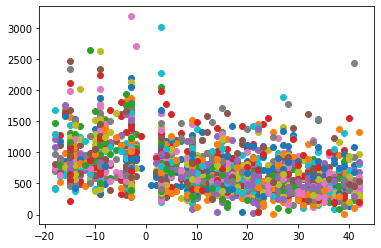

In [15]:
fig, ax = plot(cd4counts)
plt.show()